# GMRT conversion guide

In [27]:
from importlib.metadata import version
import os

try:
    import xradio

    print("XRADIO version", version("xradio"), "already installed.")
except ImportError as exc:
    print(f"Could not import XRADIO: {exc}")
    print("Installing XRADIO")

    os.system("pip install xradio")

    import xradio

    print("xradio version", version("xradio"), " installed.")

XRADIO version 0.0.47 already installed.


## Download dataset

In [28]:
import toolviper

# toolviper.utils.data.download(file="gmrt.ms")

## Convert to Processing Set

In [29]:
from xradio.measurement_set import convert_msv2_to_processing_set

ms_file = "gmrt.ms"
main_chunksize = {"frequency": 1, "time": 20}  # baseline, polarization
outfile = "small_lofar.vis.zarr"
convert_msv2_to_processing_set(
    in_file=ms_file,
    out_file=outfile,
    parallel=False,
    overwrite=True,
    main_chunksize=main_chunksize,
)

[2025-01-17 15:04:18,871]     INFO   toolviper:  Partition scheme that will be used: ['DATA_DESC_ID', 'OBSERVATION_ID', 'FIELD_ID'] 
[2025-01-17 15:04:18,876]     INFO   toolviper:  Number of partitions: 1 
[2025-01-17 15:04:18,877]     INFO   toolviper:  OBSERVATION_ID [0], DDI [0], STATE [-1], FIELD [3], SCAN [7] 


## Processing Set

In [30]:
from xradio.measurement_set import open_processing_set

ps = open_processing_set(ps_store=outfile)
ps.summary()

,name,intents,shape,polarization,scan_number,spw_name,field_name,source_name,line_name,field_coords,start_frequency,end_frequency
0,gmrt_0,[obs_0],"(2, 435, 64, 4)","[RR, RL, LR, LL]",[7],spw_0,[3C286_3],[3C286_3],[],"[fk5, 13h31m08.28s, 30d30m32.90s]",551562500.0,748437500.0


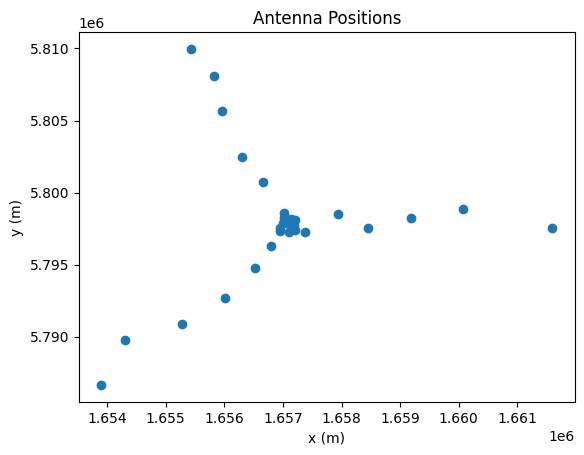

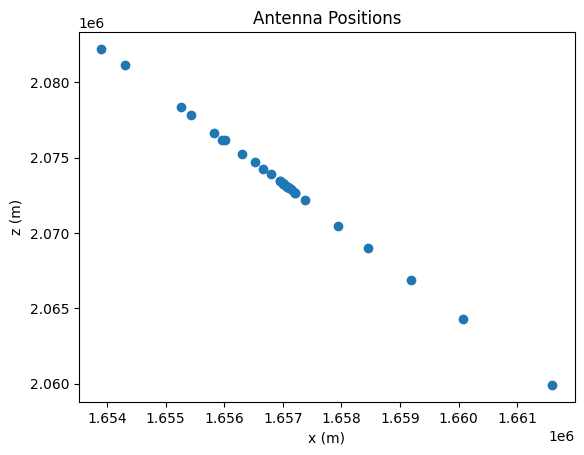

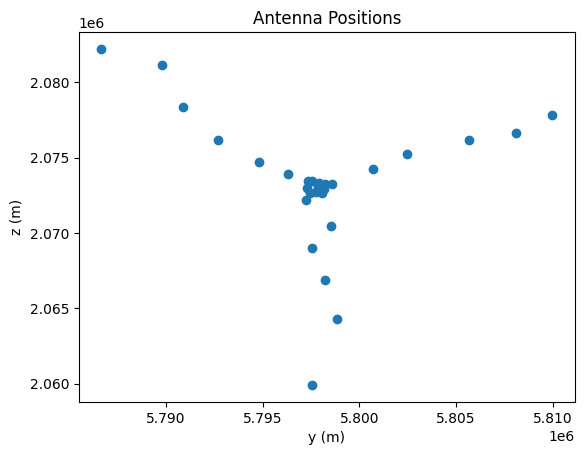

In [31]:
ps.plot_antenna_positions()

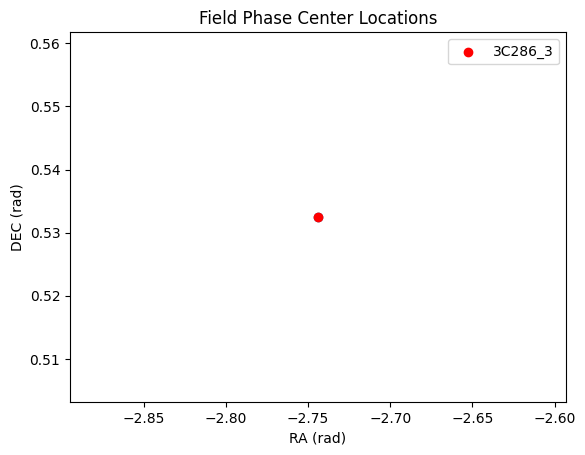

In [32]:
ps.plot_phase_centers()

## Measurement Sets

### Visibility dataset

In [33]:
ms0 = ps.get(0)
ms0

<xarray.MeasurementSetXds> Size: 3MB
Dimensions:                     (baseline_id: 435, time: 2, frequency: 64,
                                 polarization: 4, uvw_label: 3)
Coordinates:
    baseline_antenna1_name      (baseline_id) <U3 5kB dask.array<chunksize=(435,), meta=np.ndarray>
    baseline_antenna2_name      (baseline_id) <U3 5kB dask.array<chunksize=(435,), meta=np.ndarray>
  * baseline_id                 (baseline_id) int64 3kB 0 1 2 3 ... 432 433 434
    scan_number                 (time) int64 16B dask.array<chunksize=(2,), meta=np.ndarray>
  * time                        (time) float64 16B 1.72e+09 1.72e+09
  * frequency                   (frequency) float64 512B 5.516e+08 ... 7.484e+08
  * polarization                (polarization) <U2 32B 'RR' 'RL' 'LR' 'LL'
  * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
Data variables:
    EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 7kB dask.array<chunksize=(2, 435), meta=np.ndarray>
    FLAG                        (time, baseline_id, frequency, polarization) bool 223kB dask.array<chunksize=(2, 435, 1, 4), meta=np.ndarray>
    TIME_CENTROID               (time, baseline_id) float64 7kB dask.array<chunksize=(2, 435), meta=np.ndarray>
    UVW                         (time, baseline_id, uvw_label) float64 21kB dask.array<chunksize=(2, 435, 3), meta=np.ndarray>
    VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 2MB dask.array<chunksize=(2, 435, 1, 4), meta=np.ndarray>
    WEIGHT                      (time, baseline_id, frequency, polarization) float32 891kB dask.array<chunksize=(2, 435, 1, 4), meta=np.ndarray>
Attributes:
    creation_date:     2025-01-17T14:04:18.895519+00:00
    data_groups:       {'base': {'correlated_data': 'VISIBILITY', 'flag': 'FL...
    observation_info:  {'observer': ['TEST_PM'], 'project': '', 'release_date...
    partition_info:    {'field_name': ['3C286_3'], 'intents': ['obs_0'], 'lin...
    processor_info:    {'sub_type': '', 'type': ''}
    schema_version:    4.0.-9987
    type:              visibility
    xradio_version:    0.0.47
    antenna_xds:       <xarray.Dataset> Size: 4kB\nDimensions:               ...

In [36]:
ms0.coords["frequency"]

<xarray.DataArray 'frequency' (frequency: 64)> Size: 512B
array([5.515625e+08, 5.546875e+08, 5.578125e+08, 5.609375e+08, 5.640625e+08,
       5.671875e+08, 5.703125e+08, 5.734375e+08, 5.765625e+08, 5.796875e+08,
       5.828125e+08, 5.859375e+08, 5.890625e+08, 5.921875e+08, 5.953125e+08,
       5.984375e+08, 6.015625e+08, 6.046875e+08, 6.078125e+08, 6.109375e+08,
       6.140625e+08, 6.171875e+08, 6.203125e+08, 6.234375e+08, 6.265625e+08,
       6.296875e+08, 6.328125e+08, 6.359375e+08, 6.390625e+08, 6.421875e+08,
       6.453125e+08, 6.484375e+08, 6.515625e+08, 6.546875e+08, 6.578125e+08,
       6.609375e+08, 6.640625e+08, 6.671875e+08, 6.703125e+08, 6.734375e+08,
       6.765625e+08, 6.796875e+08, 6.828125e+08, 6.859375e+08, 6.890625e+08,
       6.921875e+08, 6.953125e+08, 6.984375e+08, 7.015625e+08, 7.046875e+08,
       7.078125e+08, 7.109375e+08, 7.140625e+08, 7.171875e+08, 7.203125e+08,
       7.234375e+08, 7.265625e+08, 7.296875e+08, 7.328125e+08, 7.359375e+08,
       7.390625e+08, 7.421875e+08, 7.453125e+08, 7.484375e+08])
Coordinates:
  * frequency  (frequency) float64 512B 5.516e+08 5.547e+08 ... 7.484e+08
Attributes:
    channel_width:         {'attrs': {'type': 'quantity', 'units': ['Hz']}, '...
    observer:              TOPO
    reference_frequency:   {'attrs': {'observer': 'TOPO', 'type': 'spectral_c...
    spectral_window_id:    0
    spectral_window_name:  spw_0
    type:                  spectral_coord
    units:                 ['Hz']

### Field and source dataset

In [34]:
ms0["VISIBILITY"].attrs["field_and_source_xds"]

<xarray.Dataset> Size: 216B
Dimensions:                 (sky_dir_label: 2, line_label: 1)
Coordinates:
    field_name              <U7 28B ...
  * line_label              (line_label) <U21 84B '0'
    line_name               (line_label) <U1 4B dask.array<chunksize=(1,), meta=np.ndarray>
  * sky_dir_label           (sky_dir_label) <U3 24B 'ra' 'dec'
    source_name             <U7 28B ...
Data variables:
    FIELD_PHASE_CENTER      (sky_dir_label) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
    LINE_REST_FREQUENCY     (line_label) float64 8B dask.array<chunksize=(1,), meta=np.ndarray>
    LINE_SYSTEMIC_VELOCITY  (line_label) float64 8B dask.array<chunksize=(1,), meta=np.ndarray>
    SOURCE_LOCATION         (sky_dir_label) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
Attributes:
    is_ephemeris:  False
    type:          field_and_source

### Antenna dataset

In [35]:
ms0.attrs["antenna_xds"]

<xarray.Dataset> Size: 4kB
Dimensions:                 (antenna_name: 30, cartesian_pos_label: 3,
                             receptor_label: 2)
Coordinates:
  * antenna_name            (antenna_name) <U3 360B 'C00' 'C01' ... 'W05' 'W06'
  * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
    mount                   (antenna_name) <U6 720B dask.array<chunksize=(30,), meta=np.ndarray>
    polarization_type       (antenna_name, receptor_label) <U1 240B dask.array<chunksize=(30, 2), meta=np.ndarray>
  * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
    station                 (antenna_name) <U6 720B dask.array<chunksize=(30,), meta=np.ndarray>
    telescope_name          (antenna_name) <U4 480B dask.array<chunksize=(30,), meta=np.ndarray>
Data variables:
    ANTENNA_DISH_DIAMETER   (antenna_name) float64 240B dask.array<chunksize=(30,), meta=np.ndarray>
    ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 720B dask.array<chunksize=(30, 3), meta=np.ndarray>
    ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 480B dask.array<chunksize=(30, 2), meta=np.ndarray>
Attributes:
    overall_telescope_name:  GMRT
    relocatable_antennas:    False
    type:                    antenna